<a href="https://colab.research.google.com/github/escapingLife/mashinePrograming/blob/master/5%EC%A3%BC%EC%B0%A8/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

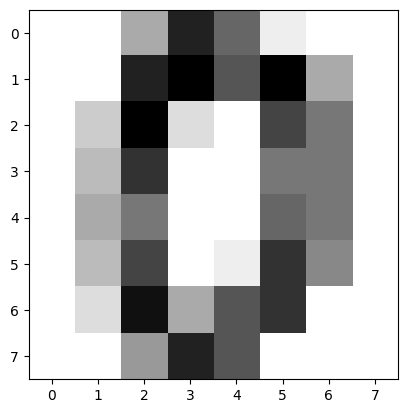

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
  data, digits.target, test_size=0.2
 )


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=1000)

In [19]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# -----------------------------
# 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)


[7]
[7]
[5]


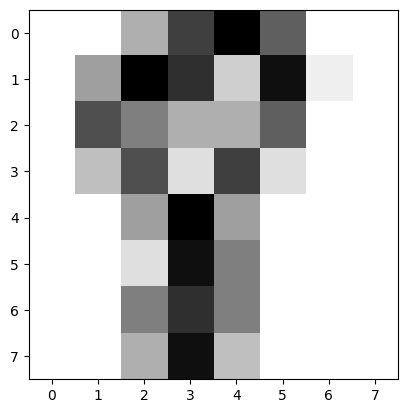

In [22]:
# 이미지를 출력하기 위하여 평탄화된 이미지를 다시 8×8 형상으로 만든다.
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

y_dt_pred = dt.predict([X_test[10]]) # 입력은 항상 2차원 행렬이어야 한다.
y_rf_pred = rf.predict([X_test[10]])
y_lr_pred = lr.predict([X_test[10]])

print(y_dt_pred)
print(y_rf_pred)
print(y_lr_pred)

[5]


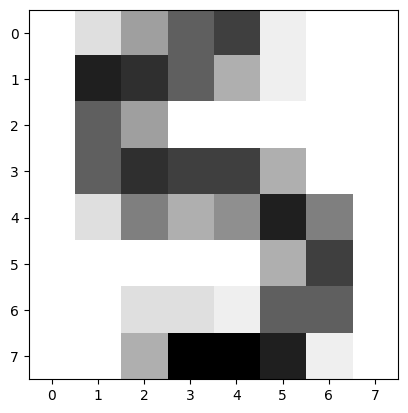

In [13]:
# 이미지를 출력하기 위하여 평탄화된 이미지를 다시 8×8 형상으로 만든다.
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

y_pred = knn.predict([X_test[10]]) # 입력은 항상 2차원 행렬이어야 한다.
print(y_pred)


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 테스트 데이터로 예측해본다.
dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)
knn_acc = accuracy_score(y_test, y_pred)

# 정확도를 계산한다
print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

print("=== KNN Test Accuracy ===")
print(f"KNN. : {knn_acc:.4f}")
print(confusion_matrix(y_test, y_pred))


=== DT Test Accuracy ===
Decision Tree : 0.8472
[[32  0  0  0  0  0  0  0  1  0]
 [ 0 31  3  0  0  0  0  1  2  2]
 [ 0  1 31  1  0  0  1  0  0  1]
 [ 0  1  4 28  0  0  1  0  3  1]
 [ 1  3  0  0 27  1  1  2  0  0]
 [ 0  0  0  0  3 31  1  0  1  2]
 [ 0  0  0  0  2  0 42  0  0  0]
 [ 0  0  0  1  0  0  0 35  1  1]
 [ 2  1  2  0  0  1  0  1 24  1]
 [ 0  1  0  1  1  1  0  0  0 24]]
=== RF Test Accuracy ===
Random Forest : 0.9722
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  1  0  1]
 [ 0  0  0  0 34  0  0  1  0  0]
 [ 0  0  0  0  0 37  1  0  0  0]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  1]
 [ 0  1  0  0  0  0  0  1 29  1]
 [ 0  0  0  0  0  0  0  0  0 28]]
=== LR Test Accuracy ===
Logistic Reg. : 0.9611
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  1  0  1  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  1  0  0 33  0  0  1  0  0]
 [ 0  0  0  1  0 35  0  1  0 